In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
matches = pd.read_csv("archive\matches.csv")

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           52 non-null     int64  
 1   team1            52 non-null     object 
 2   team2            52 non-null     object 
 3   date             52 non-null     object 
 4   match_number     52 non-null     int64  
 5   venue            52 non-null     object 
 6   city             52 non-null     object 
 7   toss_winner      52 non-null     object 
 8   toss_decision    52 non-null     object 
 9   player_of_match  51 non-null     object 
 10  umpire1          52 non-null     object 
 11  umpire2          52 non-null     object 
 12  reserve_umpire   52 non-null     object 
 13  match_referee    52 non-null     object 
 14  winner           50 non-null     object 
 15  winner_runs      25 non-null     float64
 16  winner_wickets   24 non-null     float64
 17  match_type       5

In [4]:
#Removing Unnecessary data
matches = matches.drop(columns=['season','match_type'])

In [5]:
#celean and format the data
#conver 'data' column to datetime
matches['date'] = pd.to_datetime(matches['date'])

In [6]:
# Optional: Check for missing values in important columns
print("\nMissing values in each column:")
print(matches.isnull().sum())


Missing values in each column:
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     1
umpire1             0
umpire2             0
reserve_umpire      0
match_referee       0
winner              2
winner_runs        27
winner_wickets     28
dtype: int64


In [7]:
print("First few Rows of Data")
matches.head()

First few Rows of Data


,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets
0,Canada,United States of America,2024-06-01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0
1,Papua New Guinea,West Indies,2024-06-02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0
2,Oman,Namibia,2024-06-02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN
3,Sri Lanka,South Africa,2024-06-03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0
4,Afghanistan,Uganda,2024-06-03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN


In [13]:
#coin toss wins per team
toss_win_count = matches['toss_winner'].value_counts()
print("\nCoin toss won by each team:")
print(toss_win_count)


Coin toss won by each team:
toss_winner
England                     6
Australia                   5
Afghanistan                 4
India                       4
New Zealand                 4
United States of America    3
South Africa                3
Namibia                     3
Pakistan                    3
Netherlands                 3
West Indies                 3
Nepal                       2
Bangladesh                  2
Oman                        2
Uganda                      2
Scotland                    1
Sri Lanka                   1
Ireland                     1
Name: count, dtype: int64


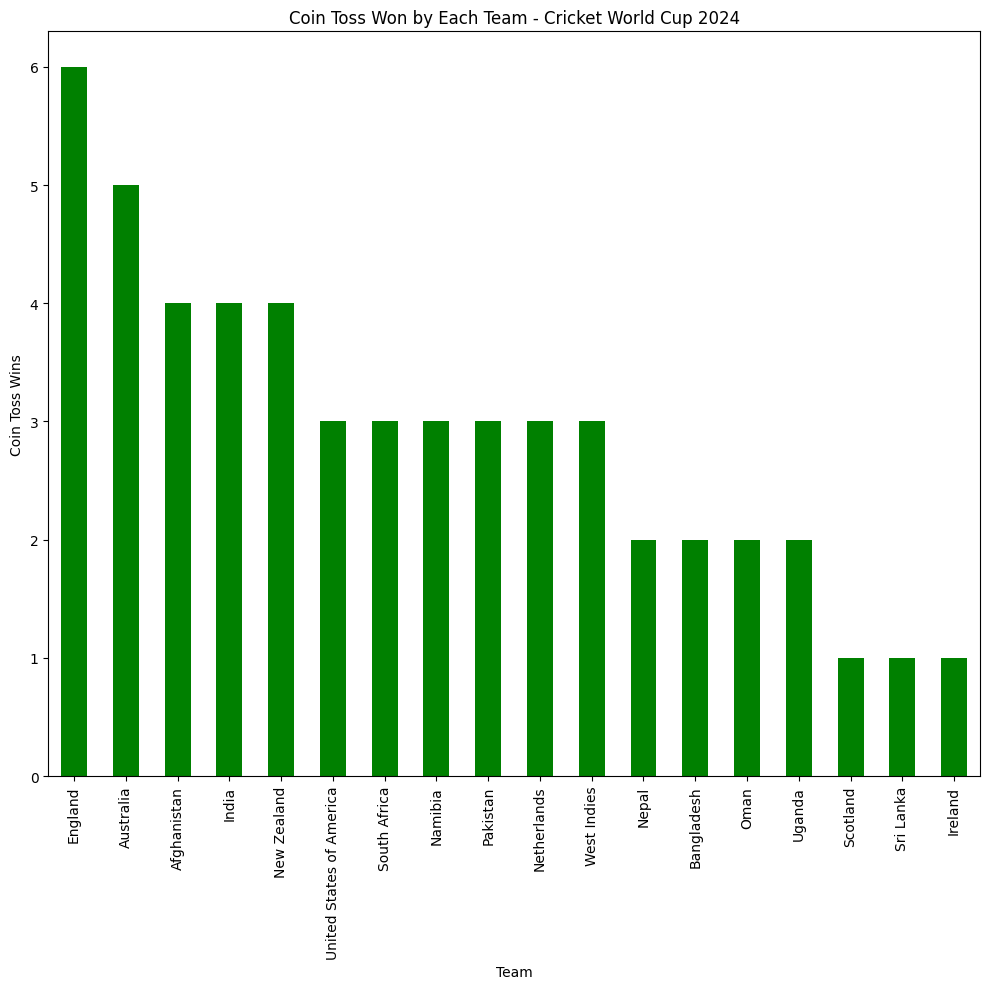

In [14]:
#Plotting Wins per team
plt.figure(figsize=(10,10))
toss_win_count.plot(kind = 'bar',color='green')
plt.title("Coin Toss Won by Each Team - Cricket World Cup 2024")
plt.xlabel("Team")
plt.ylabel("Coin Toss Wins")
plt.tight_layout()
plt.show()

In [15]:
# Toss decision distribution
toss_decision_counts = matches['toss_decision'].value_counts()
print("\nToss decision counts:")
print(toss_decision_counts)


Toss decision counts:
toss_decision
field    42
bat      10
Name: count, dtype: int64


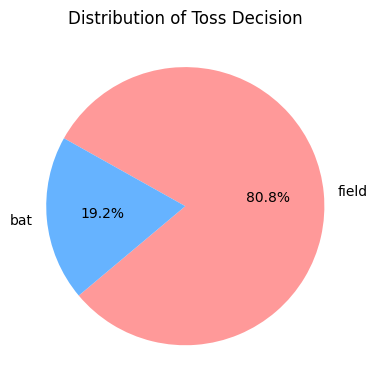

In [16]:
plt.figure(figsize=(4,4))
toss_decision_counts.plot(kind='pie', autopct='%1.1f%%', startangle=220, colors=['#ff9999','#66b3ff'])
plt.title("Distribution of Toss Decision")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [17]:
# Count wins per team 
win_counts = matches['winner'].value_counts()
print('\nMatches won by each team:')
print(win_counts)


Matches won by each team:
winner
South Africa                8
India                       8
West Indies                 5
Afghanistan                 5
Australia                   5
England                     4
Bangladesh                  3
Scotland                    2
Pakistan                    2
New Zealand                 2
United States of America    1
No Result                   1
Netherlands                 1
Uganda                      1
Canada                      1
Sri Lanka                   1
Name: count, dtype: int64


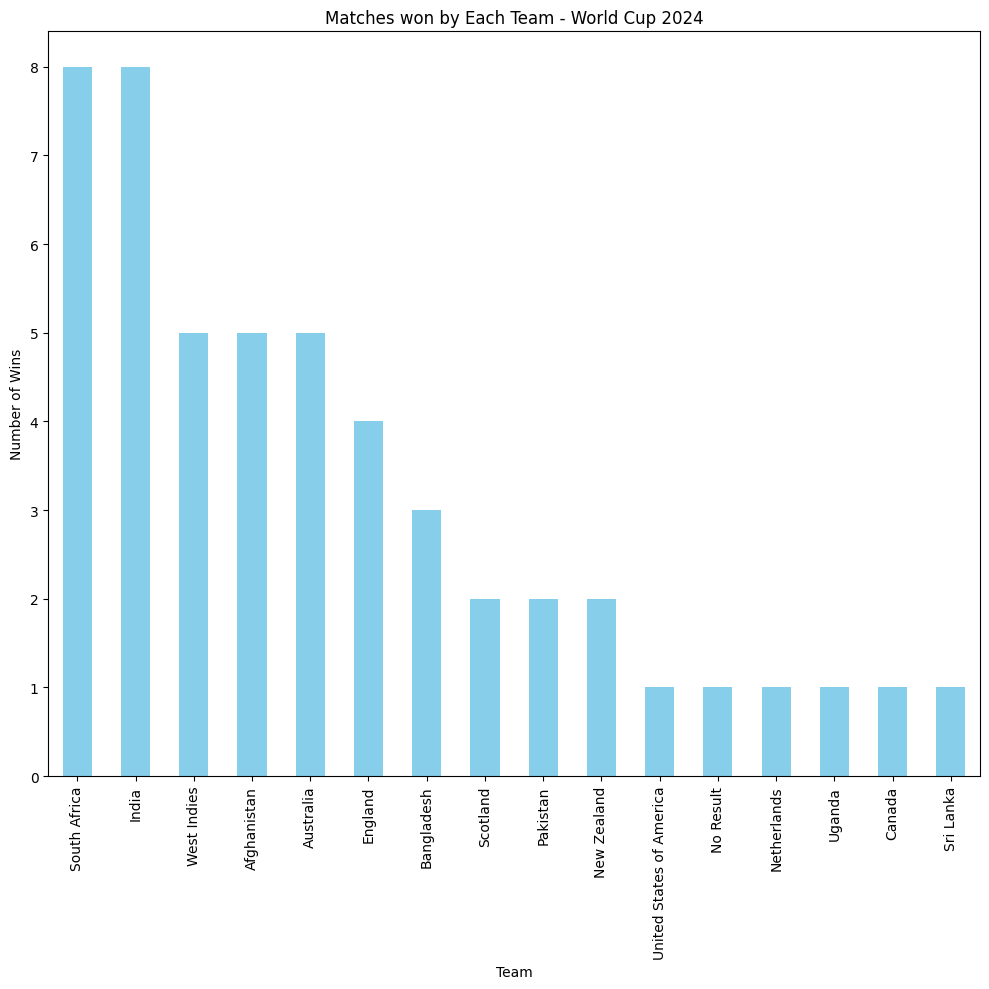

In [18]:
# plotting wins per team
plt.figure(figsize=(10,10))
win_counts.plot(kind='bar',color = 'skyblue')
plt.title("Matches won by Each Team - World Cup 2024")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.tight_layout()
plt.show()

In [ ]:
# Filter out matches without a winner
matches_winners =  matches.dropna(subset=['winner'])


In [20]:
# Gropu by winning team,then calculate the average runs and wickets
team_stats = matches_winners.groupby('winner').agg({
    'winner_runs': 'mean',
    'winner_wickets': 'mean'
}).reset_index()

print("Team Stats:\n",team_stats)

Team Stats:
                       winner  winner_runs  winner_wickets
0                Afghanistan    59.500000        7.000000
1                  Australia    34.333333        7.000000
2                 Bangladesh    23.000000        2.000000
3                     Canada    12.000000             NaN
4                    England    41.000000        8.666667
5                      India    33.666667        7.500000
6                Netherlands          NaN        6.000000
7                New Zealand          NaN        8.000000
8                  No Result          NaN             NaN
9                   Pakistan          NaN        5.000000
10                  Scotland          NaN        6.000000
11              South Africa     7.500000        5.500000
12                 Sri Lanka    83.000000             NaN
13                    Uganda          NaN        3.000000
14  United States of America          NaN        7.000000
15               West Indies    83.666667        7.000000


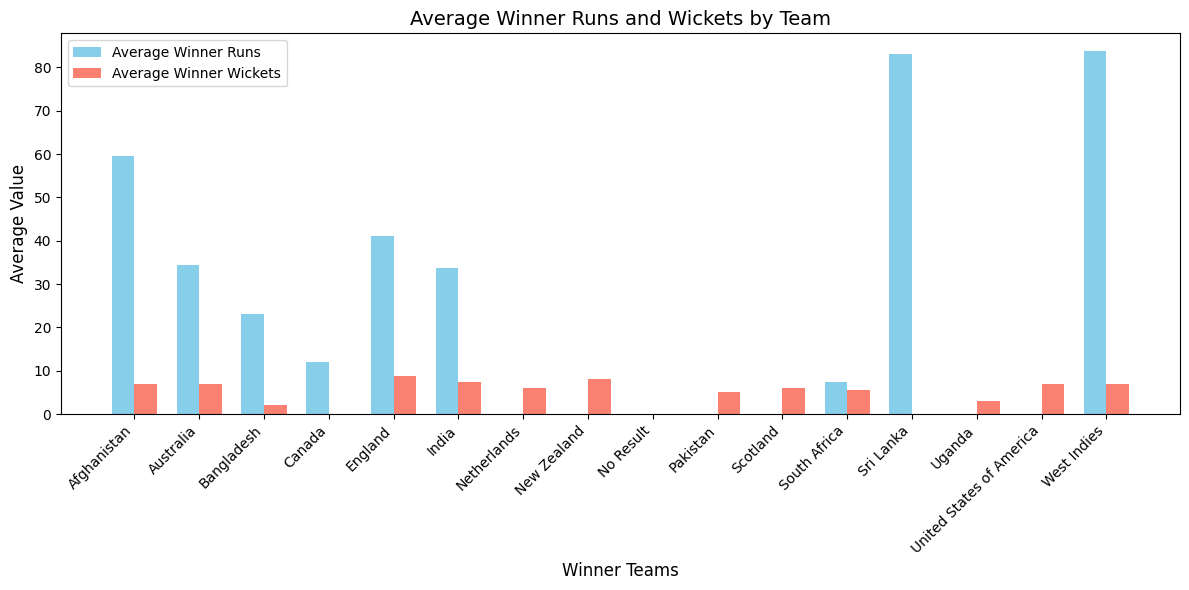

In [21]:
# Prepare data for the grouped bar chart
teams = team_stats['winner']           # Winning teams
avg_runs = team_stats['winner_runs']     # Average winner runs
avg_wickets = team_stats['winner_wickets']  # Average winner wickets

# Determine positions and width for bars
x_positions = range(len(teams))
bar_width = 0.35

# Creating the figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for average winner runs
ax.bar([p - bar_width/2 for p in x_positions], avg_runs, 
       width=bar_width, label='Average Winner Runs', color='skyblue')

# Plot bars for average winner wickets next to runs
ax.bar([p + bar_width/2 for p in x_positions], avg_wickets, 
       width=bar_width, label='Average Winner Wickets', color='salmon')

# Customizing the labels, title, and x-ticks
ax.set_xlabel('Winner Teams', fontsize=12)
ax.set_ylabel('Average Value', fontsize=12)
ax.set_title('Average Winner Runs and Wickets by Team', fontsize=14)
ax.set_xticks(list(x_positions))
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [22]:
#Count of 'Player of the Match' awards to see top perfrormers
player_awards = matches['player_of_match'].value_counts(dropna=True).head(10)
print("\nTop 10 Players with 'Player of the Match' awards:")
print(player_awards)


Top 10 Players with 'Player of the Match' awards:
player_of_match
T Shamsi               2
Q de Kock              2
AU Rashid              2
Fazalhaq Farooqi       2
RL Chase               2
JJ Bumrah              2
MP Stoinis             2
A Zampa                2
HC Brook               1
Shaheen Shah Afridi    1
Name: count, dtype: int64


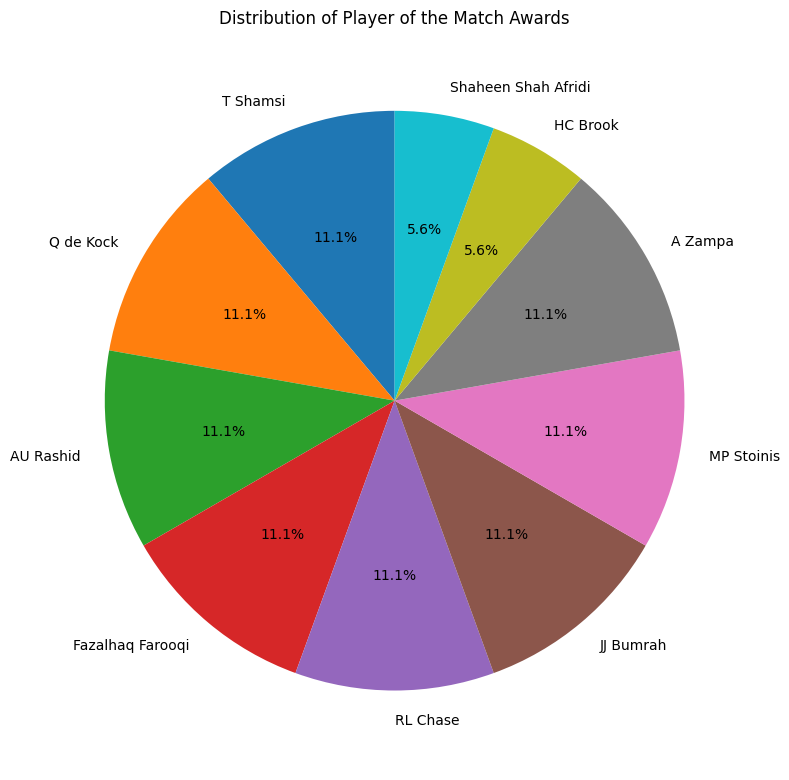

In [27]:
#create the pie chart
plt.figure(figsize = (8,8))
plt.pie(player_awards,labels=player_awards.index,autopct='%1.1f%%',startangle=90)

plt.title("Distribution of Player of the Match Awards")
plt.axis('equal') # Ensure the pie chat is circular
plt.tight_layout()
plt.show()

In [23]:
matches_awards  = matches.dropna(subset=['player_of_match','winner'])
matches_awards =  matches_awards[matches_awards["winner"] != "No Result"]
awards_by_country = matches_awards['winner'].value_counts()
print("Awards by Country:\n",awards_by_country)

Awards by Country:
 winner
South Africa                8
India                       8
West Indies                 5
Afghanistan                 5
Australia                   5
England                     4
Bangladesh                  3
Scotland                    2
Pakistan                    2
New Zealand                 2
United States of America    1
Netherlands                 1
Uganda                      1
Canada                      1
Sri Lanka                   1
Name: count, dtype: int64


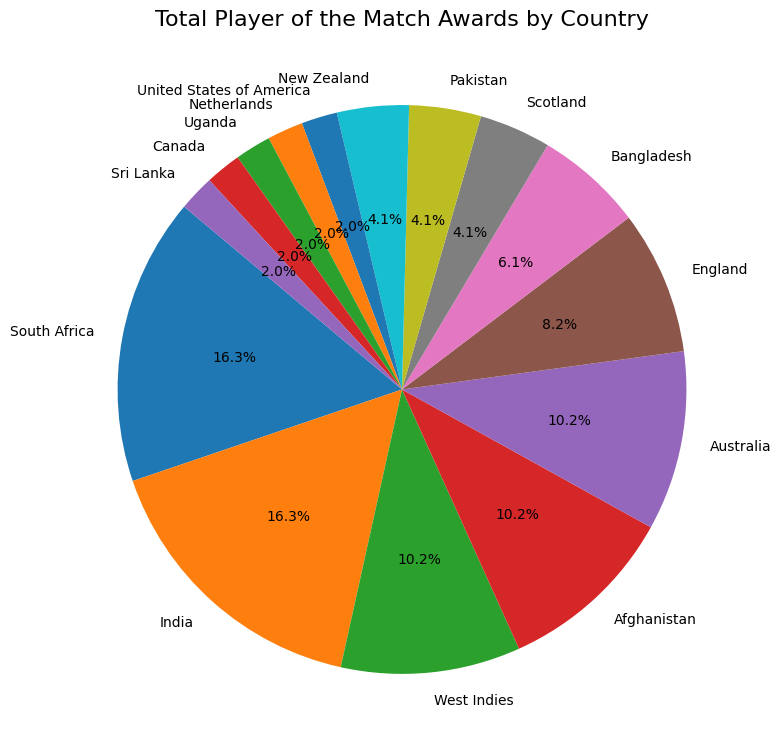

In [24]:
# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(awards_by_country,
        labels=awards_by_country.index,
        autopct='%1.1f%%',
        startangle=140)
plt.title("Total Player of the Match Awards by Country", fontsize=16)
plt.tight_layout()
plt.show()